In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1d_93d9oFNRBK9Vg6BRxs9wvRbKtNTylY',
                                    dest_path='content/pneumonia_dataset.zip',
                                    unzip=True)

Unzipping...Done.


In [ ]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import accuracy_score
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
data=[]                                                                                 # we created an empty array called data
img_size = 100                                                                          # defined img_size to be 100
def create_data():                                                                      # defined a func to create the data
        for item in ['normal','pneumonia']:                                             # for loop that iterates for both items of the list separately!
            path='/content/content/pneumonia_dataset/train/' + item+"/"
            
            for img in os.listdir(path):                                                # os.listdir gets you all the list of name of files located in the given path, " for each image do the following"
                try:
                    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)   # converts the image to pixels and gray scales the images
                    new_img_array=cv2.resize(img_array,(img_size,img_size))
                    # print(img_array)
                    if item == 'normal':
                        data.append([new_img_array,0])
                    else:
                        data.append([new_img_array, 1])                                 # appending the list of image pixels and respective target value in data
                except Exception as e:
                    pass                                                                # try and except is exception handling case in python, saves you from getting errors
                
            
create_data()

In [ ]:
len(data) #Total number of records including both normal and pneumonia cases

2425

In [ ]:
data[1400] # This is a case with pneumonia as can be seen through the label associated

[array([[  1,   1,   1, ...,   2,   4,   5],
        [  1,   1,   1, ...,   3,   6,   5],
        [  1,   1,   1, ...,   4,   8,  10],
        ...,
        [155, 161, 163, ..., 226, 229, 229],
        [156, 156, 167, ..., 222, 232, 230],
        [152, 163, 167, ..., 221, 229, 230]], dtype=uint8), 1]

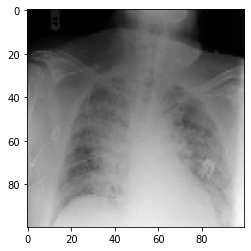

In [ ]:
plt.imshow(data[1400][0],cmap='gray') #pneumonia

In [ ]:
from google.colab.patches import cv2_imshow

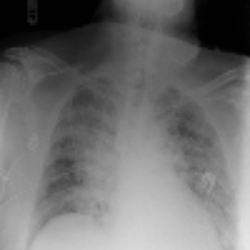

In [ ]:
cv2_imshow(cv2.resize(data[1400][0], (0,0), fx=2.5, fy=2.5)) #pneumonia

In [ ]:
data[1] #normal

[array([[ 22,  20,  19, ...,  19,  19,  20],
        [ 22,  19,  19, ...,  19,  19,  20],
        [ 21,  20,  19, ...,  19,  19,  20],
        ...,
        [230, 231, 229, ..., 227, 229, 236],
        [230, 232, 230, ..., 226, 230, 235],
        [234, 234, 234, ..., 230, 231, 238]], dtype=uint8), 0]

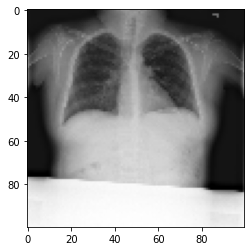

In [ ]:
plt.imshow(data[1][0],cmap='gray')#normal

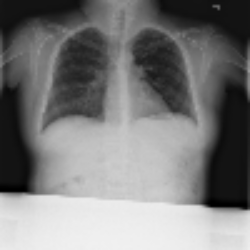

In [ ]:
cv2_imshow(cv2.resize(data[1][0], (0,0), fx=2.5, fy=2.5)) #normal

In [ ]:
np.random.shuffle(data)

In [ ]:
X = []
y = []
for image in data:
  X.append(image[0])
  y.append(image[1])



In [ ]:
type(X)

list

In [ ]:
# converting x & y to numpy array as they are list
X = np.array(X)
y = np.array(y)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X[1]

array([[27,  7,  6, ...,  0, 16, 88],
       [25,  7,  6, ...,  0, 12, 84],
       [25,  7,  6, ...,  0,  6, 80],
       ...,
       [48,  7,  4, ...,  3,  7, 58],
       [49,  7,  4, ...,  3,  6, 58],
       [50,  7,  4, ...,  3,  7, 58]], dtype=uint8)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1280, 1145]))

In [ ]:
X =  X.reshape(-1, 100, 100, 1)

In [ ]:
X.shape

(2425, 100, 100, 1)

In [ ]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
X_train.shape

(1940, 100, 100, 1)

In [ ]:
X_train[1]

array([[[  1],
        [  1],
        [  1],
        ...,
        [  1],
        [  1],
        [  1]],

       [[  1],
        [  1],
        [  1],
        ...,
        [  1],
        [  1],
        [  1]],

       [[  1],
        [  1],
        [  1],
        ...,
        [  1],
        [  1],
        [  1]],

       ...,

       [[141],
        [160],
        [173],
        ...,
        [198],
        [197],
        [191]],

       [[136],
        [153],
        [169],
        ...,
        [199],
        [199],
        [200]],

       [[129],
        [149],
        [163],
        ...,
        [202],
        [199],
        [195]]], dtype=uint8)

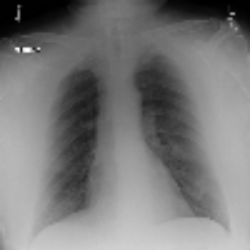

In [ ]:
cv2_imshow(cv2.resize(X_train[1], (0,0), fx=2.5, fy=2.5))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,SpatialDropout2D
from keras.optimizers import Adam
from functools import partial
from tensorflow import keras


In [ ]:
RegularizedDense=partial(keras.layers.Dense,
                         activation='elu',
                         kernel_initializer='he_normal',
                         kernel_regularizer=keras.regularizers.l2(l2=0.01))

In [ ]:
def create_model():
  cnn_model=Sequential([
                        Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(100,100,1)),
                        Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(100,100,1)),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=3),
                        Conv2D(filters=128,kernel_size=2,activation='relu',input_shape=(100,100,1)),
                        Conv2D(filters=128,kernel_size=2,activation='relu',input_shape=(100,100,1)),
                        SpatialDropout2D(0.2),
                        BatchNormalization(),
                        MaxPooling2D(pool_size=2),
                        Flatten(),
                        RegularizedDense(4096),
                        BatchNormalization(),
                        RegularizedDense(2048),
                        Dropout(0.1),
                        RegularizedDense(1024),
                        Dropout(0.2),
                        RegularizedDense(512),
                        Dropout(0.2),
                        Dense(1,activation='sigmoid')
  ])
  cnn_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
  return cnn_model

CNN_model=create_model()

In [ ]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 128)       32896     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       65664     
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 30, 30, 128)      

In [ ]:
CNN_model.fit(X_train,y_train,batch_size=100,epochs=250,verbose=2,validation_data=(X_val,y_val))

Epoch 1/250
20/20 - 168s - loss: 122.3572 - accuracy: 0.5454 - val_loss: 91.2386 - val_accuracy: 0.5361
Epoch 2/250
20/20 - 163s - loss: 64.8725 - accuracy: 0.5943 - val_loss: 46.6374 - val_accuracy: 0.5711
Epoch 3/250
20/20 - 163s - loss: 37.3226 - accuracy: 0.6294 - val_loss: 28.4320 - val_accuracy: 0.4742
Epoch 4/250
20/20 - 163s - loss: 23.1462 - accuracy: 0.6510 - val_loss: 18.0631 - val_accuracy: 0.5732
Epoch 5/250
20/20 - 164s - loss: 15.1493 - accuracy: 0.6892 - val_loss: 12.3406 - val_accuracy: 0.6021
Epoch 6/250
20/20 - 164s - loss: 10.5964 - accuracy: 0.6851 - val_loss: 9.0071 - val_accuracy: 0.5691
Epoch 7/250
20/20 - 163s - loss: 7.8630 - accuracy: 0.6861 - val_loss: 6.8102 - val_accuracy: 0.5711
Epoch 8/250
20/20 - 163s - loss: 6.0940 - accuracy: 0.7031 - val_loss: 5.5024 - val_accuracy: 0.4948
Epoch 9/250
20/20 - 165s - loss: 4.9242 - accuracy: 0.6897 - val_loss: 4.5278 - val_accuracy: 0.4639
Epoch 10/250


KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

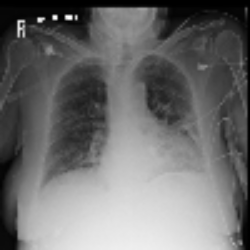

In [ ]:
# first I will apply CLAHE to improve image contrast to provide more prominent features 
cv2_imshow(cv2.resize(X_train[2], (0,0), fx=2.5, fy=2.5))# This is the image before 

(array([364., 118., 186.,  74.,  36.,  40.,  30.,  58.,  36.,  59.,  52.,
         37.,  54.,  45., 122.,  58., 138.,  87., 150., 117., 188., 235.,
        148., 217., 150., 259., 151., 244., 146., 175., 193., 131., 166.,
        104., 158., 103., 147., 102., 157.,  84., 141., 122.,  59., 135.,
        100., 111.,  92., 136.,  72., 133., 148.,  91., 126.,  88., 127.,
         80., 105.,  46.,  64.,  50.,  65.,  74.,  52.,  73.,  43.,  69.,
         48.,  66.,  58.,  96., 105.,  80., 102.,  76., 105.,  67., 115.,
         75., 116.,  76., 105., 123.,  91., 131.,  75., 109.,  97., 116.,
         79., 111., 119.,  56.,  60.,  13.,   0.,   0.,   0.,   1.,   1.,
          7.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 

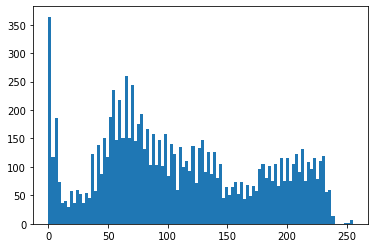

In [ ]:
plt.hist(X_train[2].flat,bins=100,range=(0,255))

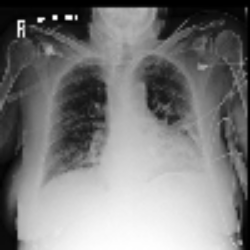

In [ ]:
#Histogram Equalization
equalized_1=cv2.equalizeHist(X_train[2])
cv2_imshow(cv2.resize(equalized_1, (0,0), fx=2.5, fy=2.5))

(array([372., 110.,  96., 124.,  76., 109.,  72., 111.,  74., 126.,  99.,
         57., 128.,  88., 102.,  46., 128.,  72., 126.,  92.,  76., 148.,
         62.,  85.,  70., 150.,  84.,  78.,  97., 151.,  71.,  89.,  84.,
         76., 126., 119.,  67., 126.,  62., 126., 109., 104.,  66., 138.,
         57., 100.,  96., 111.,  99.,  84., 141.,  76., 105.,  83., 101.,
         82.,  80.,  92., 136.,  72.,  83., 148.,  50., 142.,  75.,  88.,
         86., 121.,  72., 124., 115.,  69., 123.,  69., 117.,  91.,  91.,
         70., 119.,  70., 142., 105.,  67., 115.,  75., 116.,  76., 105.,
         78., 136.,  80.,  90., 114.,  91., 112.,  82.,  74., 117., 104.,
        111.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 

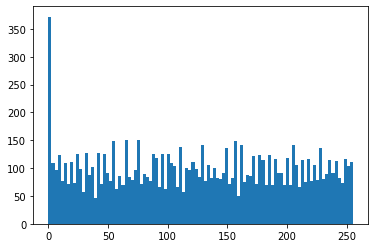

In [ ]:
plt.hist(equalized_1.flat,bins=100,range=(0,255))

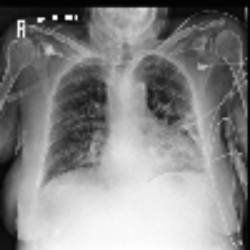

In [ ]:
#Contrast Limiting Adaptive Histogram Equalization

clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
equalized=clahe.apply(X_train[2])
cv2_imshow(cv2.resize(equalized, (0,0), fx=2.5, fy=2.5))

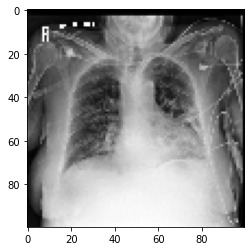

In [ ]:
plt.imshow(equalized,cmap='gray')

(array([  0., 353.,  21.,  47.,  74.,  82.,  84.,  65.,  36.,  41.,  36.,
         24.,  53.,  40.,  71.,  62.,  90.,  45.,  69.,  67., 118., 106.,
         93., 116.,  89., 107.,  90., 152.,  83., 133., 136., 103., 158.,
        113., 144.,  99., 161.,  86., 139.,  90., 145., 155.,  95., 124.,
         98., 101.,  68., 115.,  84., 117., 125.,  78., 117.,  64.,  93.,
         73., 115.,  78., 132.,  79., 150., 123.,  90., 146.,  73., 132.,
         65., 127.,  79., 125., 144.,  63., 113.,  85., 128.,  99., 119.,
         74., 100.,  58., 104., 132.,  64., 100.,  73., 115.,  87., 131.,
         71.,  87., 117.,  91., 154., 112., 163., 100., 203., 146.,  81.,
         44.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 

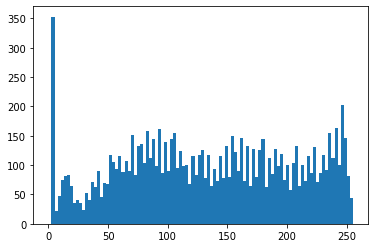

In [ ]:
plt.hist(equalized.flat,bins=100,range=(0,255))

In [ ]:
#So i will apply CLAHE to all the images instead of Histogram Equalization to avoid the noise
#clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
#X=clahe.apply(X)
def create_CLAHE():
  new_X=[]
  for item in X:
    new_X.append(clahe.apply(item))
  return new_X

new_X=np.array(create_CLAHE())

In [ ]:
type(new_X)

numpy.ndarray

In [ ]:
new_X.shape

(2425, 100, 100)

In [ ]:
new_X=new_X.reshape(-1,100,100,1)

In [ ]:
new_X.shape

(2425, 100, 100, 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(new_X,y,test_size=0.2, random_state = 42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array
from matplotlib import pyplot
%matplotlib inline

In [ ]:
X[0].shape

(100, 100, 1)

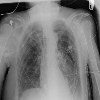

In [ ]:
cv2_imshow(X[0])

In [ ]:
# Now we will work on expanding the dataset use imagedatagenerator
datagen=ImageDataGenerator(
    rescale=1. /255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    fill_mode='nearest'
)


datagen.fit(new_X)





In [ ]:
# fits the model on batches with real-time data augmentation:
CNN_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),#steps_per_epoch=100,
          epochs=200,verbose=2,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
61/61 - 248s - loss: 4.2522 - accuracy: 0.5258 - val_loss: 3.3406 - val_accuracy: 0.5072
Epoch 2/200
61/61 - 245s - loss: 3.1502 - accuracy: 0.5155 - val_loss: 2.5436 - val_accuracy: 0.5361
Epoch 3/200
61/61 - 245s - loss: 2.0660 - accuracy: 0.5088 - val_loss: 1.6613 - val_accuracy: 0.5278
Epoch 4/200
61/61 - 244s - loss: 1.6159 - accuracy: 0.5464 - val_loss: 1.2663 - val_accuracy: 0.5773
Epoch 5/200
61/61 - 244s - loss: 1.2659 - accuracy: 0.5505 - val_loss: 1.1561 - val_accuracy: 0.5361
Epoch 6/200
61/61 - 246s - loss: 1.1305 - accuracy: 0.5412 - val_loss: 1.4302 - val_accuracy: 0.5361
Epoch 7/200
61/61 - 246s - loss: 0.9774 - accuracy: 0.5608 - val_loss: 0.9539 - val_accuracy: 0.4660
Epoch 8/200
61/61 - 244s - loss: 0.9541 - accuracy: 0.5536 - val_loss: 2.9994 - val_accuracy: 0.5361
Epoch 9/200
61/61 - 245s - loss: 0.9621 - accuracy: 0.5345 - val_loss: 4.1784 - val_accuracy: 0.5361
Epoch 10/200
61/61 - 245s - loss: 1.0616 - accuracy: 0.5284 - val_loss: 1.6813 - val_accura

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss',patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


callbacks = [earlystop, learning_rate_reduction]



CNN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 128)       32896     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       65664     
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 30, 30, 128)      

In [ ]:
training=CNN_model.fit(datagen.flow(X_train, y_train, batch_size=32),epochs=200,verbose=2,
                   #steps_per_epoch=100,
                   validation_data=(X_val,y_val),
                       validation_steps=100,callbacks=callbacks)

Epoch 1/200
61/61 - 6s - loss: 0.7870 - accuracy: 0.5459 - val_loss: 2.6067 - val_accuracy: 0.5320
Epoch 2/200
61/61 - 6s - loss: 0.7491 - accuracy: 0.5361 - val_loss: 32.9459 - val_accuracy: 0.5320
Epoch 3/200
61/61 - 6s - loss: 0.7985 - accuracy: 0.5479 - val_loss: 1.1189 - val_accuracy: 0.4742

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/200
61/61 - 6s - loss: 0.7447 - accuracy: 0.5546 - val_loss: 9.9556 - val_accuracy: 0.5320
Epoch 5/200
61/61 - 6s - loss: 0.7582 - accuracy: 0.5773 - val_loss: 6.3697 - val_accuracy: 0.5320

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/200
61/61 - 6s - loss: 0.7384 - accuracy: 0.5691 - val_loss: 5.4891 - val_accuracy: 0.5340
Epoch 7/200
61/61 - 6s - loss: 0.7342 - accuracy: 0.5758 - val_loss: 8.6184 - val_accuracy: 0.5320
Epoch 8/200
61/61 - 6s - loss: 0.7313 - accuracy: 0.5809 - val_loss: 101.0842 - val_accuracy: 0.5320

Epoch 00008: ReduceLROnPlateau reducing le

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


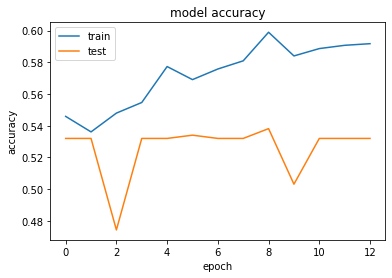

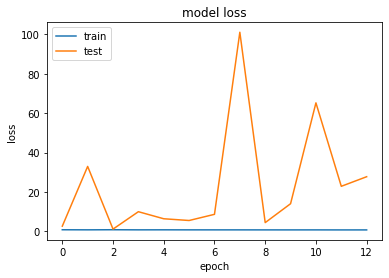

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
CNN_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       32896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 128)       65664     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 30, 30, 128)       0

In [ ]:
training=CNN_model.fit(datagen.flow(X_train, y_train, batch_size=32),epochs=200,verbose=2,
                   #steps_per_epoch=100,
                   validation_data=(X_val,y_val),
                       validation_steps=100,callbacks=callbacks)

Epoch 1/200
61/61 - 8s - loss: 1.2635 - accuracy: 0.5232 - val_loss: 67.8892 - val_accuracy: 0.5216
Epoch 2/200
61/61 - 8s - loss: 1.6606 - accuracy: 0.5134 - val_loss: 0.9395 - val_accuracy: 0.4680
Epoch 3/200
61/61 - 8s - loss: 0.9316 - accuracy: 0.5284 - val_loss: 4.3103 - val_accuracy: 0.5320
Epoch 4/200
61/61 - 8s - loss: 1.2007 - accuracy: 0.5294 - val_loss: 0.8720 - val_accuracy: 0.5320
Epoch 5/200
61/61 - 8s - loss: 1.0829 - accuracy: 0.5180 - val_loss: 0.8797 - val_accuracy: 0.5320

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/200
61/61 - 8s - loss: 0.7626 - accuracy: 0.5263 - val_loss: 0.7510 - val_accuracy: 0.5320
Epoch 7/200
61/61 - 8s - loss: 0.7700 - accuracy: 0.5273 - val_loss: 0.7755 - val_accuracy: 0.5485
Epoch 8/200
61/61 - 8s - loss: 0.8045 - accuracy: 0.5258 - val_loss: 0.7842 - val_accuracy: 0.5505
Epoch 9/200
61/61 - 8s - loss: 0.7765 - accuracy: 0.5242 - val_loss: 0.9828 - val_accuracy: 0.5361
Epoch 10/200
61/61 - 8s - l

KeyboardInterrupt: ignored

# Trying Transfer Learning using VGG16

In [ ]:
from keras.applications import VGG16
from keras import layers
from keras.layers import GlobalMaxPooling2D
from keras.models import Model


image_size = 100
input_shape = (image_size, image_size, 3)


epochs = 20
batch_size = 100

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model2 = Model(pre_trained_model.input, x)


In [ ]:
new_X.shape

(2425, 100, 100, 1)

In [ ]:
data=[]                                                                                 # we created an empty array called data
img_size = 100                                                                          # defined img_size to be 100
def create_data():                                                                      # defined a func to create the data
        for item in ['normal','pneumonia']:                                             # for loop that iterates for both items of the list separately!
            path='/content/content/pneumonia_dataset/train/' + item+"/"
            
            for img in os.listdir(path):                                                # os.listdir gets you all the list of name of files located in the given path, " for each image do the following"
                try:
                    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)   # converts the image to pixels and gray scales the images
                    new_img_array=cv2.resize(img_array,(img_size,img_size))
                    # print(img_array)
                    if item == 'normal':
                        data.append([new_img_array,0])
                    else:
                        data.append([new_img_array, 1])                                 # appending the list of image pixels and respective target value in data
                except Exception as e:
                    pass                                                                # try and except is exception handling case in python, saves you from getting errors
                
            
create_data()

In [ ]:
np.random.shuffle(data)

In [ ]:
X = []
y = []
for image in data:
  X.append(image[0])
  y.append(image[1])

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
datagen=ImageDataGenerator(
    rescale=1. /255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    fill_mode='nearest'
)


datagen.fit(X)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [ ]:
len(X_train)


1940

In [ ]:
len(X_val)

485

In [ ]:
training=model2.fit(datagen.flow(X_train, y_train, batch_size=20),verbose=2,
                   steps_per_epoch = len(X_train)//batch_size,epochs=200,batch_size=20,
                   validation_data=(X_val,y_val),
                       validation_steps = len(X_val)//batch_size,callbacks=callbacks)

Epoch 1/200
19/19 - 1s - loss: 0.5474 - accuracy: 0.7395 - val_loss: 6.9107 - val_accuracy: 0.6000
Epoch 2/200
19/19 - 1s - loss: 0.5654 - accuracy: 0.7289 - val_loss: 6.9638 - val_accuracy: 0.6125
Epoch 3/200
19/19 - 1s - loss: 0.5927 - accuracy: 0.6711 - val_loss: 7.0668 - val_accuracy: 0.6125
Epoch 4/200
19/19 - 1s - loss: 0.5813 - accuracy: 0.7053 - val_loss: 7.0106 - val_accuracy: 0.6250
Epoch 5/200
19/19 - 1s - loss: 0.5861 - accuracy: 0.7079 - val_loss: 7.1178 - val_accuracy: 0.6125
Epoch 6/200
19/19 - 1s - loss: 0.5359 - accuracy: 0.7342 - val_loss: 7.3607 - val_accuracy: 0.6125
Epoch 7/200
19/19 - 1s - loss: 0.5644 - accuracy: 0.7237 - val_loss: 7.1276 - val_accuracy: 0.6125
Epoch 8/200
19/19 - 1s - loss: 0.5456 - accuracy: 0.7316 - val_loss: 6.9389 - val_accuracy: 0.6250
Epoch 9/200
19/19 - 1s - loss: 0.5132 - accuracy: 0.7711 - val_loss: 6.7233 - val_accuracy: 0.6000
Epoch 10/200
19/19 - 1s - loss: 0.5999 - accuracy: 0.6921 - val_loss: 6.9742 - val_accuracy: 0.6250
Epoch 11/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


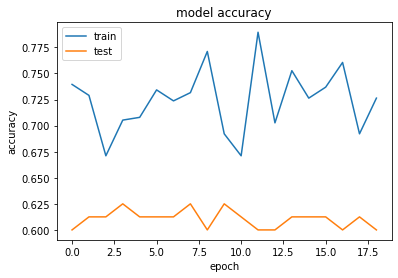

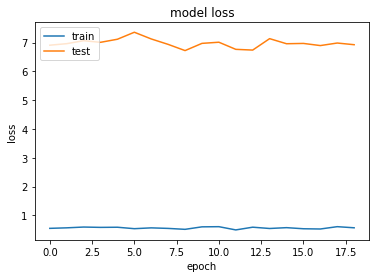

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()